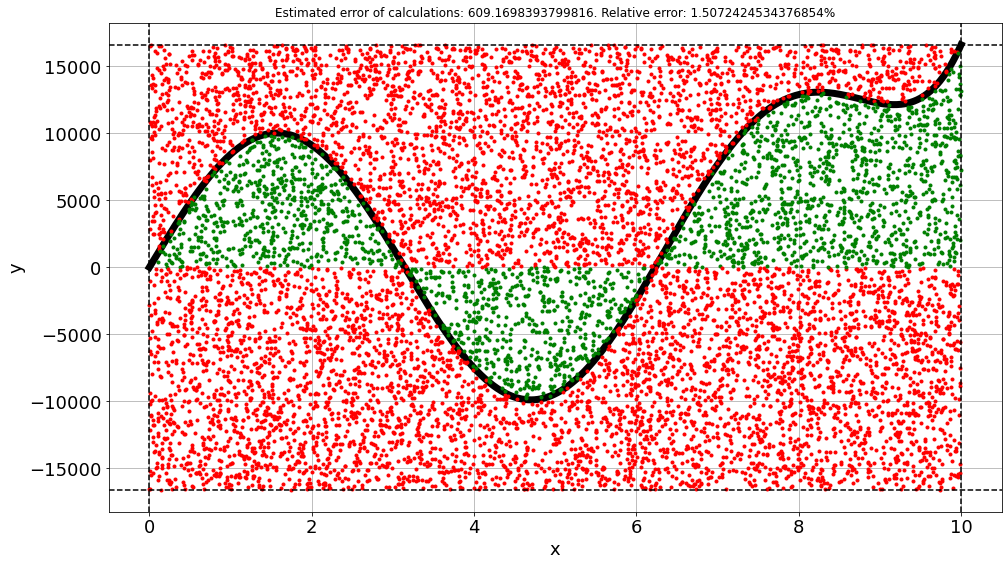

In [71]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

def f(x) : 
    return np.exp(x) + 10000*np.sin(x)

def s(a, b) : 
    return a*b

def funcRandom(bound) : 
    l = np.random.randint(low = 0, high = 2, size = 1)
    if l == 0 : 
        return np.random.rand(1, 1) * bound
    else : 
        return np.random.rand(1, 1) * (-1) * bound

a = 0 # left bound
b = 10 # right bound
x = np.linspace(a, b, 1000)
y = f(x)
b2 = np.amax(np.absolute(y))
n = 10000 # number of points
k_pos = 0 # number of appropriate points with positive y
k_neg = 0 # number of appropriate points with negative y

fig = plt.figure(figsize = (16, 9))
ax = fig.add_subplot(111)

ax.plot(x, y, marker = 'None', color = 'k', linestyle = '-', linewidth = '7')

for i in range(n) : 
    x_i = np.random.rand(1, 1) * b
    y_i = funcRandom(b2)
    
    if (y_i <= f(x_i) and f(x_i) >= 0 and y_i >= 0) : 
        k_pos += 1
        ax.plot(x_i, y_i, marker = 'o', color = 'green', markersize = '3')
    elif (y_i >= f(x_i) and f(x_i) < 0 and y_i < 0) :
        k_neg += 1
        ax.plot(x_i, y_i, marker = 'o', color = 'green', markersize = '3')
    else : 
        ax.plot(x_i, y_i, marker = 'o', color = 'red', markersize = '3')

k = k_pos - k_neg
mkint = k/n * s(b, 2*b2) # integral by Monte-Carlo method
scipyint = integrate.quad(f, a, b1) # integral by scipy.integrate.quad

plt.title('Estimated error of calculations: ' + str(np.absolute(mkint - scipyint[0])) + '. Relative error: ' + 
          str(np.absolute((mkint - scipyint[0])/scipyint[0]) * 100) + '%')




ax.axvline(x = a, linestyle = '--', color = 'k')
ax.axvline(x = b, linestyle = '--', color = 'k')
ax.axhline(y = b2, linestyle = '--', color = 'k')
ax.axhline(y = -b2, linestyle = '--', color = 'k')

xax = ax.xaxis
xlocs = xax.get_ticklocs()
xlabels = xax.get_ticklabels()
xlines = xax.get_ticklines()

xax.grid(True)

for label in xlabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
yax = ax.yaxis
ylocs = yax.get_ticklocs()
ylabels = yax.get_ticklabels()
ylines = yax.get_ticklines()
yax.grid(True)

for label in ylabels :
    label.set_color('black')
    label.set_rotation(0)
    label.set_fontsize(18)
    
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)

plt.show()